In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("engish_headlines_3_nnew.csv", encoding="latin-1")

FileNotFoundError: [Errno 2] No such file or directory: 'engish_headlines_3_nnew.csv'

In [ ]:
data

,Unnamed: 0,Date,Headline,begins_at,open_price,close_price
0,0,2/25/2018,Original Pizza Day Purchaser Does It Again Wit...,2/25/2018,9680.2000,9584.45000
1,1,2/25/2018,This 11-year-old just wrote a book on bitcoin ...,2/25/2018,9680.2000,9584.45000
2,2,2/25/2018,"Without Mentioning Blockchain, Putin Says That...",2/25/2018,9680.2000,9584.45000
3,3,2/25/2018,Meet the strippers tattooed with BARCODES so s...,2/25/2018,9680.2000,9584.45000
4,4,2/26/2018,Bitcoin Pizza Day 2: How A Lightning Payment M...,2/26/2018,9592.4950,10318.78500
...,...,...,...,...,...,...
16152,16165,2/24/2023,"Top 3 Price Prediction Bitcoin, Ethereum, Ripp...",2/24/2023,23945.4039,23185.71626
16153,16166,2/24/2023,Bitcoin price stays under $24K as PCE data hel...,2/24/2023,23945.4039,23185.71626
16154,16167,2/24/2023,What are Bitcoin [BTC] whales up to? Decodingâ¦,2/24/2023,23945.4039,23185.71626
16155,16168,2/24/2023,Bitcoin 2024 halving will be its âmost impor...,2/24/2023,23945.4039,23185.71626


In [ ]:
headlines = data["Headline"]
open_prices = data[["Date", "open_price"]]

In [ ]:
model = open("config.txt", "r").readlines()[1]
path = open("config.txt", "r").readlines()[0]

In [ ]:
sentiments_data = pd.read_csv(path[:-1])

In [ ]:
if model == "finbert":
    sentiments_data.loc[sentiments_data["Sentiment"] == "Positive", "Sentiment"] = 1
    sentiments_data.loc[sentiments_data["Sentiment"] == "Negative", "Sentiment"] = -1
    sentiments_data.loc[sentiments_data["Sentiment"] == "Neutral", "Sentiment"] = 0
elif model == "gpt":
    sentiments_data.loc[sentiments_data["Labels"] == "Positive", "Labels"] = 1
    sentiments_data.loc[sentiments_data["Labels"] == "Positive.", "Labels"] = 1
    sentiments_data.loc[sentiments_data["Labels"] == "Positive ", "Labels"] = 1
    sentiments_data.loc[sentiments_data["Labels"] == "Negative", "Labels"] = -1
    sentiments_data.loc[sentiments_data["Labels"] == "Negative.", "Labels"] = -1
    sentiments_data.loc[sentiments_data["Labels"] == "Negative ", "Labels"] = -1
    sentiments_data.loc[sentiments_data["Labels"] == "Negative  ", "Labels"] = -1
    sentiments_data.loc[sentiments_data["Labels"] == "Neutral", "Labels"] = 0
    sentiments_data.loc[sentiments_data["Labels"] == "Neutral.", "Labels"] = 0
    sentiments_data.loc[sentiments_data["Labels"] == "Neutral ", "Labels"] = 0
    sentiments_data.loc[sentiments_data["Labels"] == "Uncertain", "Labels"] = 0

    range1 = sentiments_data["Labels"] != 1
    range2 = sentiments_data["Labels"] != 0
    range3 = sentiments_data["Labels"] != -1

    range4 = range1 & range2 & range3

    sentiments_data["Labels"][range4] = 0
else:
    sentiments_data.loc[sentiments_data["Labels"] == "Pos", "Sentiment"] = 1
    sentiments_data.loc[sentiments_data["Labels"] == "Neg", "Sentiment"] = -1
    sentiments_data.loc[sentiments_data["Labels"] == "Ne", "Sentiment"] = 0

In [ ]:
sentiments_data

,Unnamed: 0,Headline,Positive,Negative,Neutral,Sentiment,Date
0,0,Original Pizza Day Purchaser Does It Again Wit...,0.039238,0.020659,0.940103,0,2/25/2018
1,1,This 11-year-old just wrote a book on bitcoin ...,0.072883,0.014962,0.912155,0,2/25/2018
2,2,"Without Mentioning Blockchain, Putin Says That...",0.251929,0.014295,0.733777,0,2/25/2018
3,3,Meet the strippers tattooed with BARCODES so s...,0.056816,0.022921,0.920263,0,2/25/2018
4,4,Bitcoin Pizza Day 2: How A Lightning Payment M...,0.039520,0.034739,0.925741,0,2/26/2018
...,...,...,...,...,...,...,...
16152,23,Morgan Creek Self-Promotes Again with Lambo Sale,0.231835,0.008140,0.760025,0,2/24/2023
16153,24,Winklevoss twins want you to imagine a day whe...,0.061663,0.025351,0.912986,0,2/24/2023
16154,25,"French 'Tabac' shops diversify, selling bitcoi...",0.557367,0.018303,0.424330,1,2/24/2023
16155,26,European Central Bank Policy Maker Calls Crypt...,0.031761,0.334079,0.634160,0,2/24/2023


In [ ]:
def simulation_trading(data, open_prices, period_days = 1, spending_period = 1, transaction_cost = 0):
    # Встановлюємо змінні витрат, баланс в долларах, баланс в біткоїнах до нулів на початку.
    spending = 0
    balance = 0
    balance_dollars = 100

    data['Date'] = pd.to_datetime(data['Date'])
    open_prices['Date'] = pd.to_datetime(open_prices['Date'])

    data = data.iloc[-365:]
    open_prices = open_prices.iloc[-365:]

    data.sort_values('Date', inplace=True)


    # Вибираємо унікальні дати, щоб проітерувати по них.
    dates_unique = pd.to_datetime(data['Date'].unique())
    balances = []
    balances_dollars = []
    balances_db = []
    spendings = []
    sentiments = []
    open_prices_days = []
    balance_ficional = 0
    with open("logging_main.txt", "w") as loggin_main:
        with open("logging.txt", "w") as logging:
            previous = 0
            for index in range(period_days - 1, len(dates_unique), period_days):
                logging.write(f"Iteration with index {previous/period_days}. \n")

                #  Вибираємо унікальні дати у поточному періоді.
                dates_unique_chunk = dates_unique[previous:index+1]
                if not len(dates_unique_chunk):
                    continue

                logging.write(f"Start date: {dates_unique_chunk[0]}.\n")
                logging.write(f"End date: {dates_unique_chunk[-1]}.\n")

                # Вибираємо дані у поточному періоді.
                after_start_date = data['Date'] >= dates_unique_chunk[0]
                before_end_date = data['Date'] <= dates_unique_chunk[-1]
                between_two_dates = after_start_date & before_end_date
                data_chunk = data.loc[between_two_dates]

                # Обраховуємо сентимент цього періоду.
                if model== "gpt":
                    sentiments_chunk = data_chunk['Labels']
                else:
                    sentiments_chunk = data_chunk['Sentiment']

                period_sentiment = sum(sentiments_chunk)/len(sentiments_chunk)
                sentiments.append(period_sentiment)

                logging.write(f"Sentiment of the period: {period_sentiment}.\n")

                open_price = open_prices[open_prices["Date"]==dates_unique_chunk[-1]].iloc[0][1]
                open_prices_days.append(open_price)

                logging.write(f"Open price of the period: {open_price}.\n")

                # Якщо сентимент позитивний, ми купуємо відповідну кількість біткоїнів за open price за весь бюджет, якщо він є.
                if period_sentiment > 0:
                    #if balance_dollars > 0:
                    balance += balance_dollars/open_price

                    balance_dollars = 0

                    balances.append(balance)
                    balances_dollars.append(balance_dollars)
                    balances_db.append(balance*open_price)

                    spending += transaction_cost

                    spendings.append(transaction_cost)

                    # # Якщо бюджет 0, тобто ми уже купували біткоїни у останньому ненульовому періоді, то ми купуємо відповідну до 1 доллара кількість біткоїнів.
                    # else:
                    #     balance += spending_period/open_price

                    #     balance_ficional += spending_period/open_price
                    #     spending += spending_period
                    #     spending += transaction_cost

                    #     spendings.append(transaction_cost+spending_period)
                    #     balances.append(balance*open_price)

                # Якщо сентимент від'ємний, то ми продаємо усі біткоїни за поточну open price та наш біткоїн-баланс стає нуль.
                elif period_sentiment < 0:
                    balance_dollars += balance*open_price
                    balance = 0
                    spending += transaction_cost

                    spendings.append(transaction_cost)
                    balances.append(balance)
                    balances_dollars.append(balance_dollars)
                    balances_db.append(balance*open_price)

                else:
                    spendings.append(0)
                    try:
                        balances.append(balances[-1])
                        balances_dollars.append(balance_dollars[-1])
                        balances_db.append(balances[-1]*open_price)

                    except:
                        balances.append(0)
                        balances_dollars.append(0)
                        balances_db.append(0*open_price)

                logging.write(f'''Sheet of the period: \n
    spending - {spending};
    dollars balance - {balance_dollars}
    balance - {balance};
    balance in dollars - {balance*open_price};''')

                loggin_main.write(f"{period_sentiment}, {spending},{balance_dollars},{balance},{open_price}\n")

                # Оновлюємо змінну previous на кількість днів в періоді, щоб продовжувати ітерувати по наступному періоді потрібного розміру.
                previous += period_days

                logging.write("\n\n")

    if balance_dollars == 0:
        roi = ((balance*open_price - 100 - spending)/(spending+100))*100
    else:
        roi = ((balance_dollars - 100 - spending)/(spending+100))*100
    print(spending, balance_dollars, balance, balance*open_price, roi)
    return (sentiments, open_prices_days, spending, balance_dollars, balance, balance*open_price, balances, balances_dollars, balances_db)

In [ ]:
sentimens_results, open_prices_days, _, _, _, _, balances, balances_D, balances_db = simulation_trading(sentiments_data, open_prices, 1, transaction_cost=0.00001)

C:\Users\Roman Kypybida\AppData\Local\Temp\ipykernel_7708\4089815782.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_prices['Date'] = pd.to_datetime(open_prices['Date'])
C:\Users\Roman Kypybida\AppData\Local\Temp\ipykernel_7708\4089815782.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('Date', inplace=True)
C:\Users\Roman Kypybida\AppData\Local\Temp\ipykernel_7708\4089815782.py:56: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consisten

0.00030000000000000014 100.89062586814626 0 0.0 0.8903231971766673


In [ ]:
sentimens_results

[0.0,
 -0.2,
 0.1,
 -0.4,
 0.3,
 -0.2,
 0.0,
 -0.3,
 -0.1111111111111111,
 0.0,
 -0.3,
 -0.1,
 0.1,
 -0.2,
 -0.3,
 -0.5,
 -0.2,
 -0.1,
 0.2,
 -0.1,
 -0.1111111111111111,
 0.0,
 0.2,
 0.2,
 0.1,
 -0.125,
 0.0,
 0.0,
 -0.1,
 -0.2,
 0.1,
 -0.4,
 -0.1,
 -0.1,
 -0.2222222222222222,
 0.0,
 0.0,
 -0.1]

In [ ]:
open_prices_diff = np.array(open_prices_days)[1:] - np.array(open_prices_days)[:-1]

In [ ]:
open_prices_diff

array([ -467.19218,   407.49218,  1590.3043 ,   116.99571,   -73.3    ,
         211.19997,  -289.29184,   427.10057,   -52.60873,    71.99999,
         -50.9    ,   711.90001,  -910.10001,   295.5    ,   605.30001,
        -240.20001,   -61.20001,  -103.89999,  -394.61517,  -170.9385 ,
         479.59785,  -279.09694, -1160.92889,  -169.05006,   231.34645,
         -75.64842,     6.14392,   406.8969 ,  2127.27425,  -813.56362,
        1070.7589 ,    53.82813,  -360.65756,   572.8323 ,  -396.40969,
        -268.66826,  -242.59777])

In [ ]:
y_perc = np.divide(open_prices_diff, np.array(open_prices_days)[:-1])*100

In [ ]:
between_range_1 = y_perc >=-0.5
between_range_2 = y_perc <= 0.5
between_range = between_range_1 & between_range_2

In [ ]:
y_class = y_perc.copy()
y_class

array([-2.21001229,  1.97116968,  7.54410222,  0.51607244, -0.32166899,
        0.92981879, -1.261889  ,  1.88681929, -0.22810771,  0.31290059,
       -0.22051338,  3.0909707 , -3.83304907,  1.2941568 ,  2.61707218,
       -1.01204173, -0.26049208, -0.44339554, -1.69152926, -0.74534044,
        2.1068864 , -1.20078135, -5.05546337, -0.77535519,  1.06937163,
       -0.34597611,  0.02819661,  1.86686689,  9.5811912 , -3.34388649,
        4.55325917,  0.21892855, -1.46365388,  2.35925233, -1.59501235,
       -1.09854801, -1.00296739])

In [ ]:
y_class[between_range] = 0

In [ ]:
y_class[y_perc < -0.5] = -1
y_class[y_perc > 0.5] = 1

In [ ]:
np.unique(y_class)

array([-1.,  0.,  1.])

In [ ]:
sentimens_results = np.array(sentimens_results)

In [ ]:
between_range_1 = sentimens_results >=-0.5
between_range_2 = sentimens_results <= 0.5
between_range = between_range_1 & between_range_2

In [ ]:
sentimens_results[sentimens_results < -0.5] = -1
sentimens_results[sentimens_results > 0.5] = 1
sentimens_results[between_range] = 0

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(sentimens_results[:-1], y_class)

array([[4, 9, 8],
       [5, 2, 1],
       [3, 2, 3]], dtype=int64)

In [ ]:
f1_score(sentimens_results[:-1], y_class, average = "weighted")

0.24364104364104366

In [ ]:
len(y_class)

37

In [ ]:
len(sentimens_results[:-1])

37

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(sentimens_results[:-1], y_class)

0.24324324324324326

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(sentimens_results[:-1], y_class, average = "weighted")

0.24324324324324326

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(sentimens_results[:-1], y_class, average = "weighted")

0.27650727650727647

In [ ]:
import matplotlib.pyplot as plt

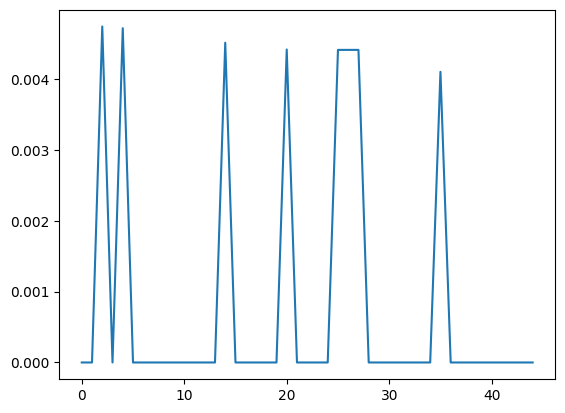

In [ ]:
plt.plot(balances)

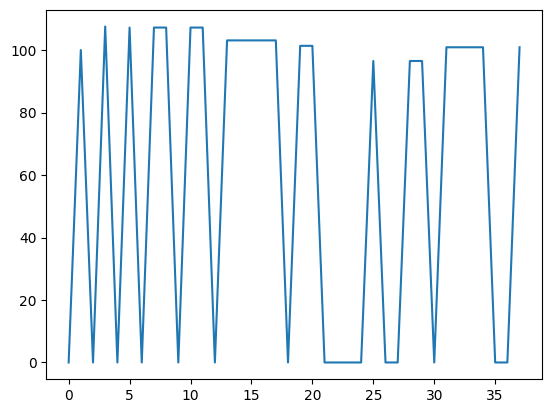

In [ ]:
plt.plot(balances_D)

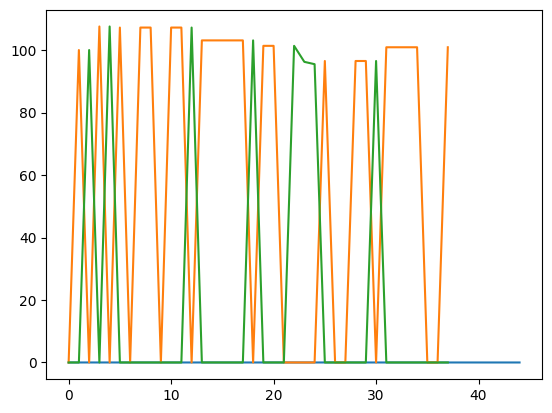

In [ ]:
plt.plot(balances)
plt.plot(balances_D)
plt.plot(balances_db)
plt.show()

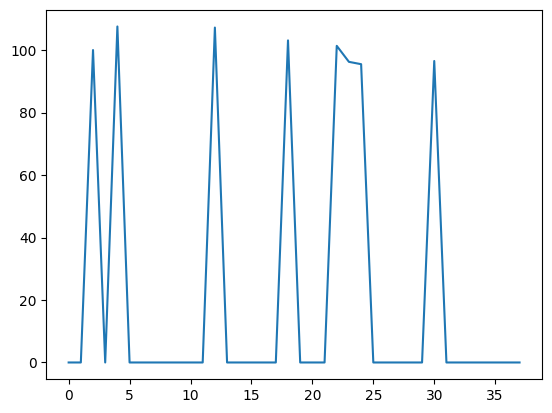

In [ ]:
plt.plot(balances_db)

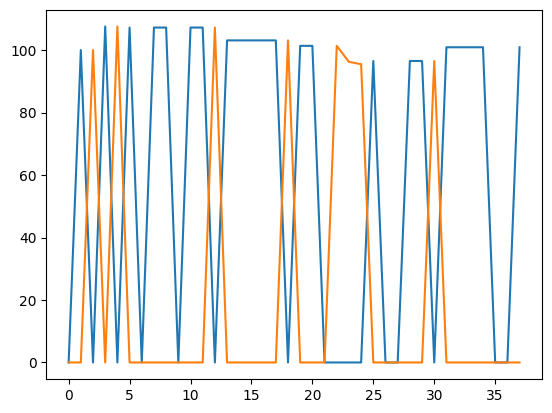

In [ ]:
plt.plot(balances_D)
plt.plot(balances_db)

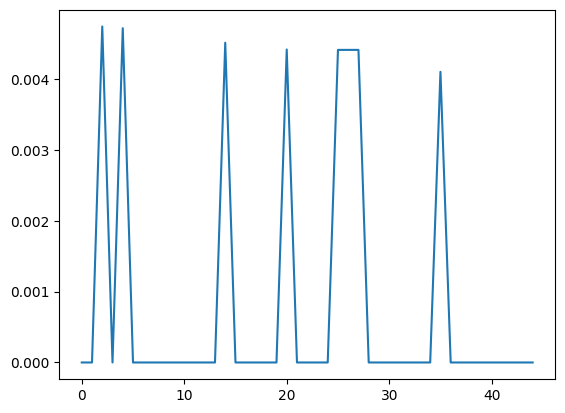

In [ ]:
plt.plot(balances[:365])

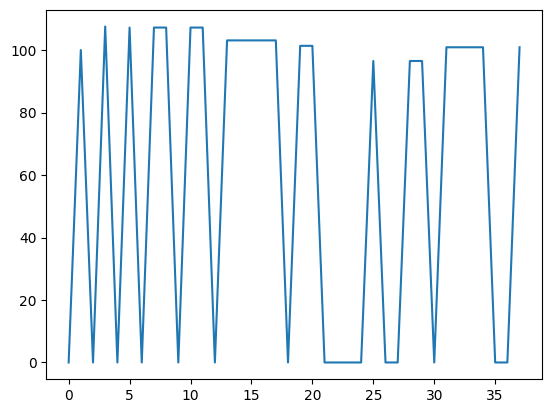

In [ ]:
plt.plot(balances_D[:365])

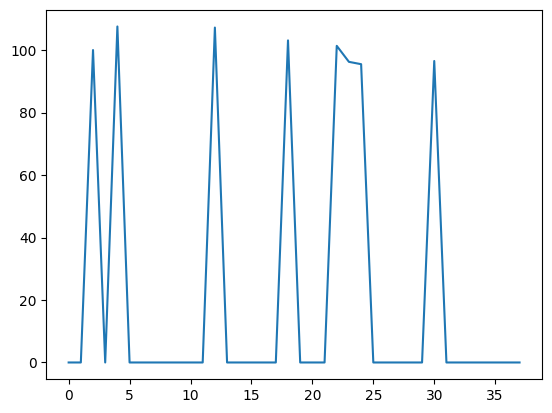

In [ ]:
plt.plot(balances_db[:365])

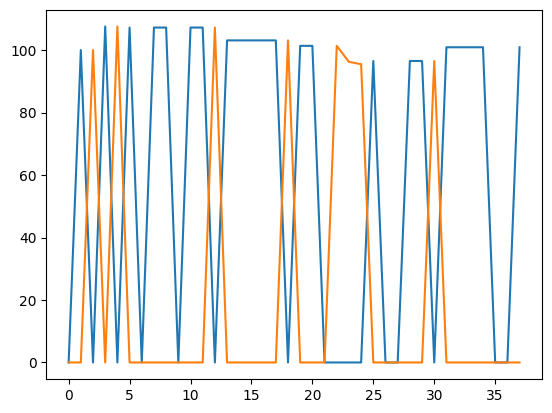

In [ ]:
plt.plot(balances_D[:365])
plt.plot(balances_db[:365])